## PXRD transformations

In [1]:
from decifer.utility import pxrd_from_cif
from decifer.decifer_dataset import DeciferDataset

import matplotlib.pyplot as plt
import random
import numpy as np

# Helper function to ensure "Discrete Peaks" is in the legend.
def add_discrete_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    if "Discrete Peaks" not in labels:
        # Add a dummy bar for the legend entry.
        ax.bar([], [], color='red', width=0.05, label="Discrete Peaks")
    ax.legend()

In [224]:
random.seed(100)
dataset_path = '../../../phd_projects/deCIFer/data/crystallm/full/serialized/train.h5'
dataset = DeciferDataset(dataset_path, ["cif_name", "cif_tokens", "xrd.q", "xrd.iq", "cif_string", "spacegroup"])
datapoint_1 = random.choice(dataset)
datapoint_2 = random.choice(dataset)

In [225]:
sample_cif = datapoint_1['cif_string']
sample_cif_2 = datapoint_2['cif_string']

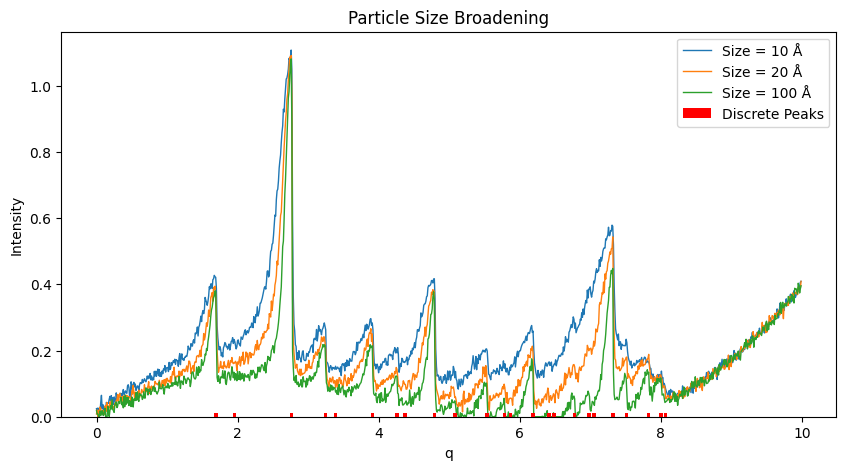

In [226]:
fig, ax = plt.subplots(figsize=(10,5))

# --- 2. Particle Size Broadening ---
for ps in [10, 20, 100]:
    res = pxrd_from_cif(
        sample_cif, 
        particle_size=ps,
        base_fwhm_range=(0.1, 0.1),
        peak_asymmetry_range=(0.9, 0.9),
        noise_range=(0.01, 0.01),
        preferred_orientation_range=(0.9,0.9),
        chebychev_norm_coeff_range=(0.1, 0.1),
        chebychev_order=3,
        debug=True)
    ax.plot(res['q'], res['iq'], lw=1, label=f"Size = {ps} Å")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
ax.bar(q_disc, np.ones_like(iq_disc)*0.01, color='red', width=0.05, zorder=5, label="Discrete Peaks")
ax.set_title("Particle Size Broadening")
ax.set_xlabel("q")
ax.set_ylabel("Intensity")
add_discrete_legend(ax)

plt.show()

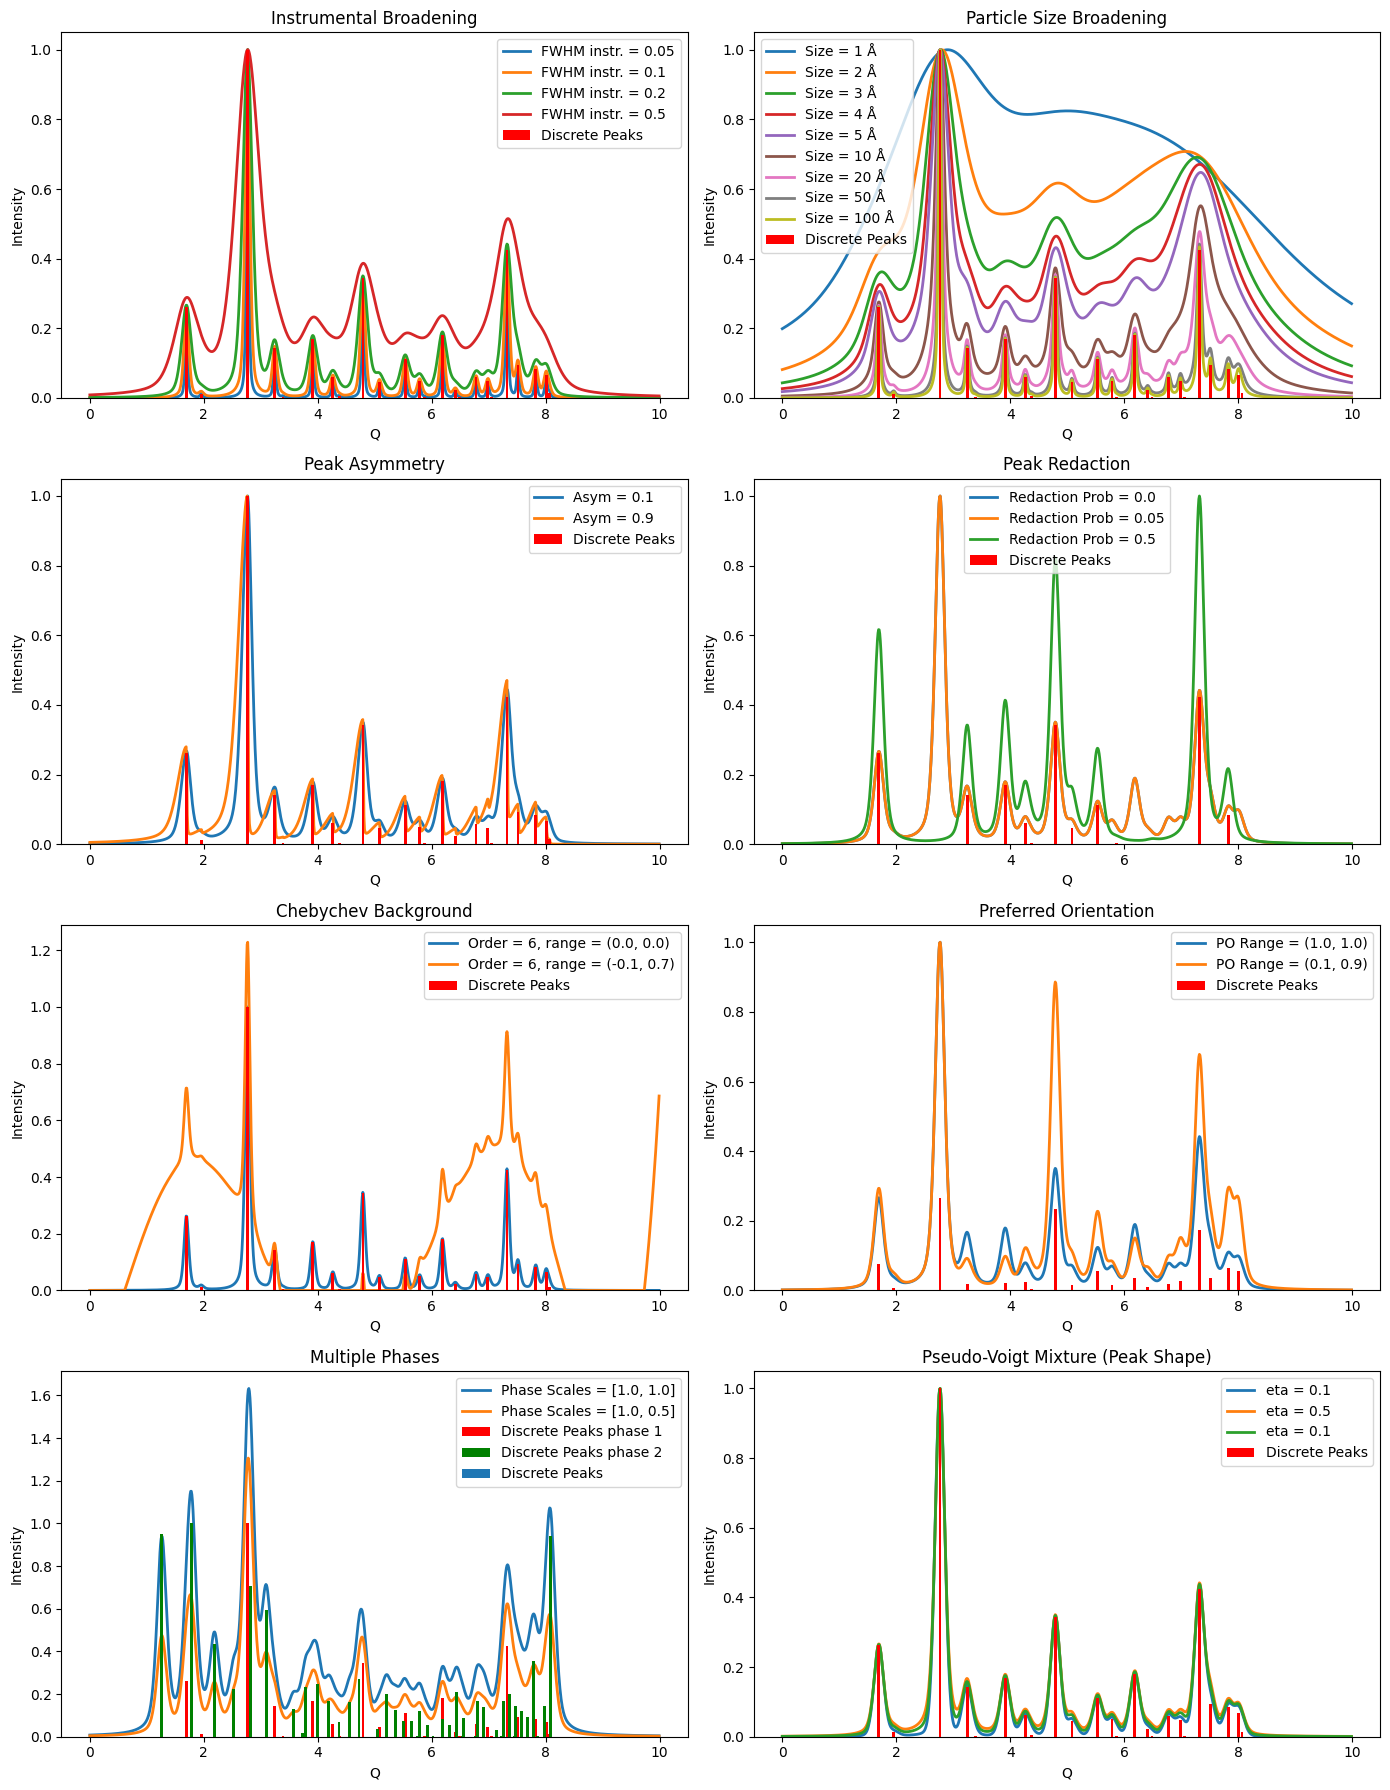

In [227]:
# Create a figure with 8 subplots (4 rows x 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(14, 18))
axs = axs.flatten()

# --- 1. Base Broadnening ---
for fwhm in [0.05, 0.1, 0.2, 0.5]:
    res_base = pxrd_from_cif(sample_cif, base_fwhm_range=(fwhm, fwhm), debug=True)
    axs[0].plot(res_base['q'], res_base['iq'], lw=2, label=f"FWHM instr. = {fwhm}")
q_disc = res_base['q_disc'][0]
iq_disc = res_base['iq_disc'][0]
axs[0].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[0].set_title("Instrumental Broadening")
axs[0].set_xlabel("Q")
axs[0].set_ylabel("Intensity")
add_discrete_legend(axs[0])

# --- 2. Particle Size Broadening ---
for ps in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    res = pxrd_from_cif(sample_cif, particle_size=ps, debug=True)
    axs[1].plot(res['q'], res['iq'], lw=2, label=f"Size = {ps} Å")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[1].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[1].set_title("Particle Size Broadening")
axs[1].set_xlabel("Q")
axs[1].set_ylabel("Intensity")
add_discrete_legend(axs[1])

# --- 3. Peak Asymmetry ---
for asym in [0.1, 0.9]:
    res = pxrd_from_cif(sample_cif, peak_asymmetry_range=(asym, asym), base_fwhm_range=(0.2, 0.2), debug=True)
    axs[2].plot(res['q'], res['iq'], lw=2, label=f"Asym = {asym}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[2].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[2].set_title("Peak Asymmetry")
axs[2].set_xlabel("Q")
axs[2].set_ylabel("Intensity")
add_discrete_legend(axs[2])

# --- 4. Peak Redaction ---
for red_prob in [0.0, 0.05, 0.5]:
    res = pxrd_from_cif(sample_cif, peak_redaction_prob=red_prob, base_fwhm_range=(0.2, 0.2), debug=True)
    axs[3].plot(res['q'], res['iq'], lw=2, label=f"Redaction Prob = {red_prob}")
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[3].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[3].set_title("Peak Redaction")
axs[3].set_xlabel("Q")
axs[3].set_ylabel("Intensity")
add_discrete_legend(axs[3])

# --- 5. Chebychev Background ---
for params in [
    {"chebychev_order": 6, "chebychev_norm_coeff_range": (0.0, 0.0)},
    {"chebychev_order": 6, "chebychev_norm_coeff_range": (-.1, 0.7)}
]:
    res = pxrd_from_cif(sample_cif, **params, base_fwhm_range=(0.1, 0.1), debug=True)
    label = f"Order = {params['chebychev_order']}, range = {params['chebychev_norm_coeff_range']}"
    axs[4].plot(res['q'], res['iq'], lw=2, label=label)
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[4].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[4].set_title("Chebychev Background")
axs[4].set_xlabel("Q")
axs[4].set_ylabel("Intensity")
add_discrete_legend(axs[4])

# --- 6. Preferred Orientation ---
for po_range in [(1.0, 1.0), (0.1, 0.9)]:
    res = pxrd_from_cif(sample_cif, preferred_orientation_range=po_range, base_fwhm_range=(0.2, 0.2), debug=True)
    label = f"PO Range = {po_range}"
    axs[5].plot(res['q'], res['iq'], lw=2, label=label)
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[5].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[5].set_title("Preferred Orientation")
axs[5].set_xlabel("Q")
axs[5].set_ylabel("Intensity")
add_discrete_legend(axs[5])

# --- 7. Multiple Phases ---
for scales in [[1.0, 1.0], [1.0, 0.5]]:
    res = pxrd_from_cif([sample_cif, sample_cif_2], phase_scales=scales, base_fwhm_range=(0.2, 0.2), debug=True)
    label = f"Phase Scales = {scales}"
    axs[6].plot(res['q'], res['iq'], lw=2, label=label)

q_disc_1 = res['q_disc'][0]
iq_disc_1 = res['iq_disc'][0]
q_disc_2 = res['q_disc'][1]
iq_disc_2 = res['iq_disc'][1]
axs[6].bar(q_disc_1, iq_disc_1/100, color='red', width=0.05, zorder=5, label="Discrete Peaks phase 1")
axs[6].bar(q_disc_2, iq_disc_2/100, color='green', width=0.05, zorder=5, label="Discrete Peaks phase 2")
axs[6].set_title("Multiple Phases")
axs[6].set_xlabel("Q")
axs[6].set_ylabel("Intensity")
add_discrete_legend(axs[6])

# --- 8. PV Mixture on Peak Shape ---
for eta_rng in [(0.1, 0.1), (0.5, 0.5), (0.1, 0.9)]:
    res = pxrd_from_cif(sample_cif, eta_range=eta_rng, base_fwhm_range=(0.2, 0.2), debug=True)
    label = f"eta = {eta_rng[0]}"
    axs[7].plot(res['q'], res['iq'], lw=2, label=label)
    q_disc = res['q_disc'][0]
    iq_disc = res['iq_disc'][0]
axs[7].bar(q_disc, iq_disc/100, color='red', width=0.05, zorder=5, label="Discrete Peaks")
axs[7].set_title("Pseudo-Voigt Mixture (Peak Shape)")
axs[7].set_xlabel("Q")
axs[7].set_ylabel("Intensity")
add_discrete_legend(axs[7])

plt.tight_layout()
plt.show()

In [228]:
from decifer.decifer_model import Decifer
from bin.evaluate import load_model_from_checkpoint
from bin.train import TrainConfig
from decifer.utility import (
    generate_continuous_xrd_from_cif,
    replace_symmetry_loop_with_P1,
    extract_space_group_symbol,
    reinstate_symmetry_loop,
    is_space_group_consistent,
    is_atom_site_multiplicity_consistent,
    is_formula_consistent,
    bond_length_reasonableness_score,
)

from decifer.tokenizer import Tokenizer
import torch

import crystal_toolkit
from pymatgen.vis.structure_chemview import quick_view
from pymatgen.core import Structure
    
from tqdm.notebook import tqdm
from scipy.stats import wasserstein_distance

PADDING_ID = Tokenizer().padding_id
START_ID = Tokenizer().token_to_id["data_"]
DECODE = Tokenizer().decode

In [229]:
# Load model
model_path = "../../../phd_projects/deCIFer/experiments/model__conditioned_mlp_augmentation__context_3076__robust_full_trainingcurves/ckpt.pt"
model = load_model_from_checkpoint(model_path, device='cuda')

number of total non-trainable parameters: 26.14M
number of total trainable parameters: 27.72M
number of total conditioning MLP parameters: 0.78M


In [230]:
def experiment(cif_sample, params_dict, model, n_repeats=1, cif_sample_other=None):
    """
    Run an experiment by generating PXRD patterns and corresponding CIF outputs over a set of parameters.
    Additionally, compare the generated structure with the reference structure using StructureMatcher
    and compare the PXRD peaks to obtain a peak similarity measure.
    
    Args:
        cif_sample (str): The baseline CIF string.
        params_dict (dict): Dictionary where each key is a parameter name for pxrd_from_cif and the value is a list of values.
        model: The generative model with a generate_custom() method.
        n_repeats (int, optional): Number of repeats per parameter combination.
        cif_sample_other (str, optional): An alternative CIF (for multi-phase experiments).
    
    Returns:
        dict: Dictionary with keys for each parameter combination and a list of experiment results.
              Each result contains the PXRD data, conditional vector, generated CIF, generated structure,
              reference structure, structure matching result, and a peak similarity metric.
    """
    results = {}
    param_keys = list(params_dict.keys())
    # Set up the StructureMatcher with the desired tolerances.
    matcher = StructureMatcher(stol=0.5, angle_tol=10, ltol=0.3)

       # Create a list of all parameter combinations.
    combos = list(product(*[params_dict[key] for key in param_keys]))
    total_combos = len(combos)
    combo_index = 0

    for combo in combos:
        combo_index += 1
        param_combo = dict(zip(param_keys, combo))
        combo_key = "_".join(f"{key}-{val}" for key, val in param_combo.items())
        print(f"Processing parameter combination {combo_index}/{total_combos}: {combo_key}")
        results[combo_key] = []
        
        for repeat in range(n_repeats):
            print(f"  Processing repeat {repeat+1}/{n_repeats}")
            # Use a multi-phase input if cif_sample_other is provided.
            cif_input = [cif_sample, cif_sample_other] if cif_sample_other is not None else cif_sample
            
            # Generate the PXRD from the input structure(s).
            pxrd_ref = pxrd_from_cif(cif_input, debug=True, **param_combo)
            
            # Convert the continuous PXRD intensity to a conditional vector.
            cond_vec = torch.from_numpy(pxrd_ref['iq']).unsqueeze(0).to('cuda')
            
            # Use the model to generate a new CIF.
            generated = model.generate_custom(
                idx=torch.tensor([START_ID]).unsqueeze(0).to('cuda'),
                max_new_tokens=3076,
                cond_vec=cond_vec,
                start_indices_batch=[[0]],
                disable_pbar = True,
            ).cpu().numpy()
            
            # Remove padding and decode the generated tokens.
            generated = [ids[ids != PADDING_ID] for ids in generated]
            cif_string_gen = DECODE(generated[0])
            
            # Fix potential symmetry issues.
            cif_string_gen = replace_symmetry_loop_with_P1(cif_string_gen)
            spacegroup_symbol = extract_space_group_symbol(cif_string_gen)
            if spacegroup_symbol != "P 1":
                cif_string_gen = reinstate_symmetry_loop(cif_string_gen, spacegroup_symbol)
            
            # Build the generated structure.
            structure_gen = Structure.from_str(cif_string_gen, fmt="cif")
            # Build the reference structure from the input CIF.
            structure_ref = Structure.from_str(cif_sample, fmt="cif")
            
            # Compare the structures.
            structure_match = matcher.fit(structure_ref, structure_gen)
            
            # Compute a PXRD for the generated CIF using the same parameters.
            pxrd_gen = pxrd_from_cif(cif_string_gen, debug=True, **param_combo)
            
            # Compute a peak similarity measure between the continuous PXRD intensities.
            # (Here we use the Pearson correlation coefficient between the "iq" arrays.)
            peak_similarity = np.corrcoef(pxrd_ref['iq'], pxrd_gen['iq'])[0, 1]
            
            # Residual weighted profile
            pxrd_ref_clean = pxrd_from_cif(cif_input, debug=True)
            pxrd_gen_clean = pxrd_from_cif(cif_string_gen, debug=True)
            rwp = np.sqrt(np.sum(np.square(pxrd_ref_clean['iq'] - pxrd_gen_clean['iq'])) / np.sum(np.square(pxrd_ref_clean['iq'])))
            
            # WD
#             wd_value = wasserstein_distance(
#                 pxrd_ref_clean['q_disc'],
#                 pxrd_gen_clean['q_disc'], 
#                 u_weights=np.array(pxrd_ref_clean['iq_disc'])/100, 
#                 v_weights= np.array(pxrd_gen_clean['iq_disc'])/100,
#             )
            wd_value = 0 
            
            # Validity
            form = is_formula_consistent(cif_string_gen)
            sg = is_space_group_consistent(cif_string_gen)
            mplt = is_atom_site_multiplicity_consistent(cif_string_gen)
            bond = bond_length_reasonableness_score(cif_string_gen) >= 1.0
            val = form and sg and mplt and bond
            
            # Save the experiment result.
            exp_result = {
                "params": param_combo,
                "repeat": repeat,
                "pxrd_ref": pxrd_ref,                     # PXRD from the input structure(s)
                "pxrd_gen": pxrd_gen,                     # PXRD from the generated CIF
                "cond_vec": cond_vec,                     # Conditional vector passed to the model
                "generated_cif": cif_string_gen,          # Generated CIF string
                "generated_structure": structure_gen,
                "reference_structure": structure_ref,
                "structure_match": structure_match,       # Boolean: True if structures match
                "peak_similarity": peak_similarity,        # Pearson correlation (1 means perfect match)
                "rwp": rwp,
                "wd": wd_value,
                "val": val,
            }
            results[combo_key].append(exp_result)
    
    return results

In [231]:
params_dict = {"particle_size": [1, 5, 20, 100]}
res = experiment(sample_cif, params_dict, model, n_repeats=10)

Processing parameter combination 1/4: particle_size-1
  Processing repeat 1/10
  Processing repeat 2/10
  Processing repeat 3/10
  Processing repeat 4/10
  Processing repeat 5/10
  Processing repeat 6/10
  Processing repeat 7/10
  Processing repeat 8/10
  Processing repeat 9/10
  Processing repeat 10/10
Processing parameter combination 2/4: particle_size-5
  Processing repeat 1/10
  Processing repeat 2/10
  Processing repeat 3/10
  Processing repeat 4/10
  Processing repeat 5/10
  Processing repeat 6/10
  Processing repeat 7/10
  Processing repeat 8/10
  Processing repeat 9/10
  Processing repeat 10/10
Processing parameter combination 3/4: particle_size-20
  Processing repeat 1/10
  Processing repeat 2/10
  Processing repeat 3/10
  Processing repeat 4/10
  Processing repeat 5/10
  Processing repeat 6/10
  Processing repeat 7/10
  Processing repeat 8/10
  Processing repeat 9/10
  Processing repeat 10/10
Processing parameter combination 4/4: particle_size-100
  Processing repeat 1/10
  P

In [235]:
def plot_experiment_results(results):
    """
    Create a figure that compares the experiment results.
    For each parameter combination, plot the generated PXRD pattern (continuous and discrete)
    and annotate with the structure matching result.
    """
    n_combos = len(results)
    n_cols = 2
    n_rows = (n_combos + 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    axs = axs.flatten()
    
    for i, (combo_key, experiments) in enumerate(results.items()):
        ax = axs[i]
        # For simplicity, use the first repeat for plotting.
        exp = experiments[0]

        q_disc = exp["pxrd_ref"]["q_disc"][0]
        iq_disc = exp["pxrd_ref"]["iq_disc"][0]
        ax.bar(q_disc, iq_disc/100, width=0.05, zorder=5, alpha=0.5, label="Ref")
        
        q_disc = exp["pxrd_gen"]["q_disc"][0]
        iq_disc = exp["pxrd_gen"]["iq_disc"][0]
        ax.bar(q_disc, iq_disc/100, width=0.05, zorder=5, alpha=0.5, label="Gen")
        
        # Annotate with the structure match result and peak similarity.
        match_status = "Match" if exp["structure_match"] else "Mismatch"
        peak_sim = exp["peak_similarity"]
        rwp = exp['rwp']
        ax.set_title(f"{combo_key}\nStructure: {match_status}\nPeak similarity: {peak_sim:.2f}\nRwp: {rwp:.2f}")
        ax.set_xlabel("Q")
        ax.set_ylabel("Intensity")
        ax.legend()
    
    # Turn off any extra subplots.
    for j in range(i + 1, len(axs)):
        axs[j].axis("off")
    
    plt.tight_layout()
    plt.show()

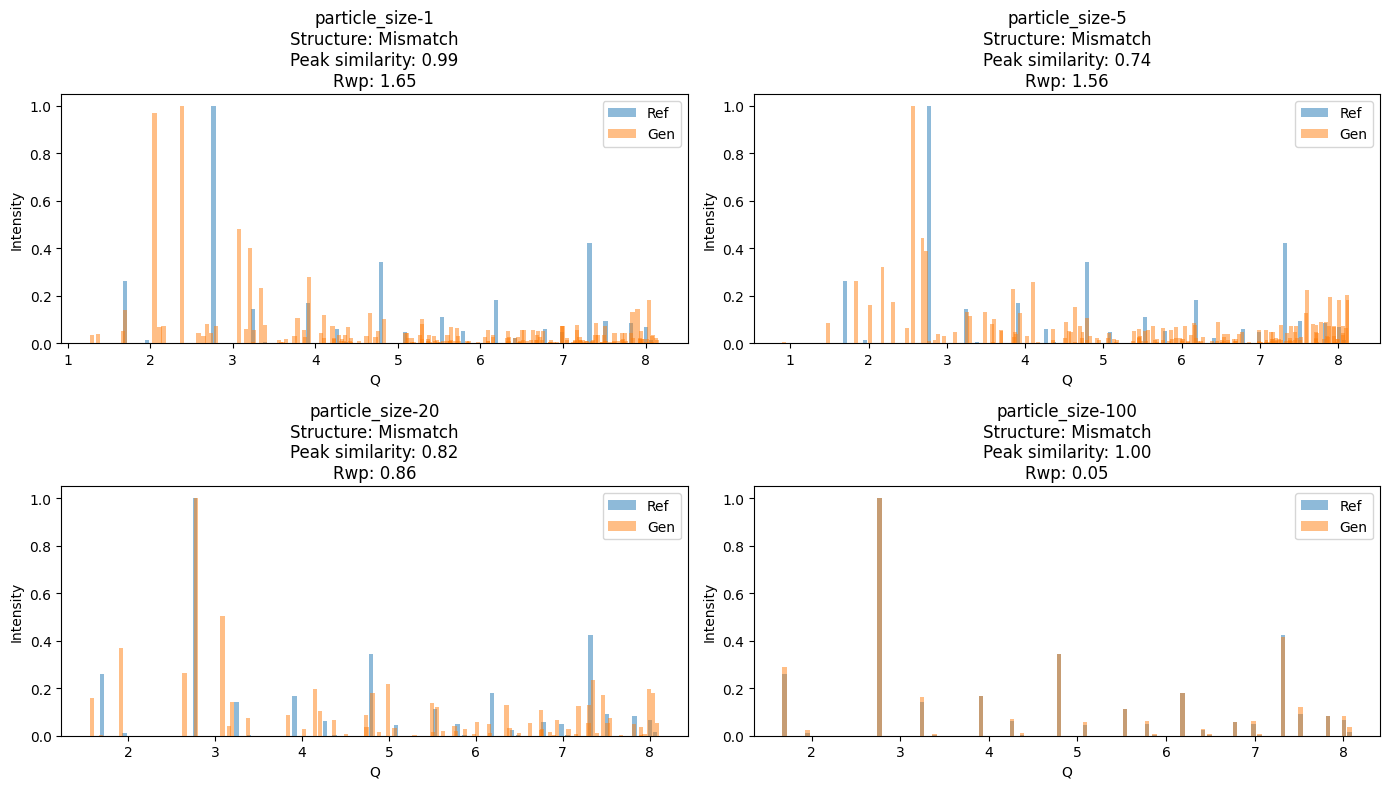

In [236]:
plot_experiment_results(res)

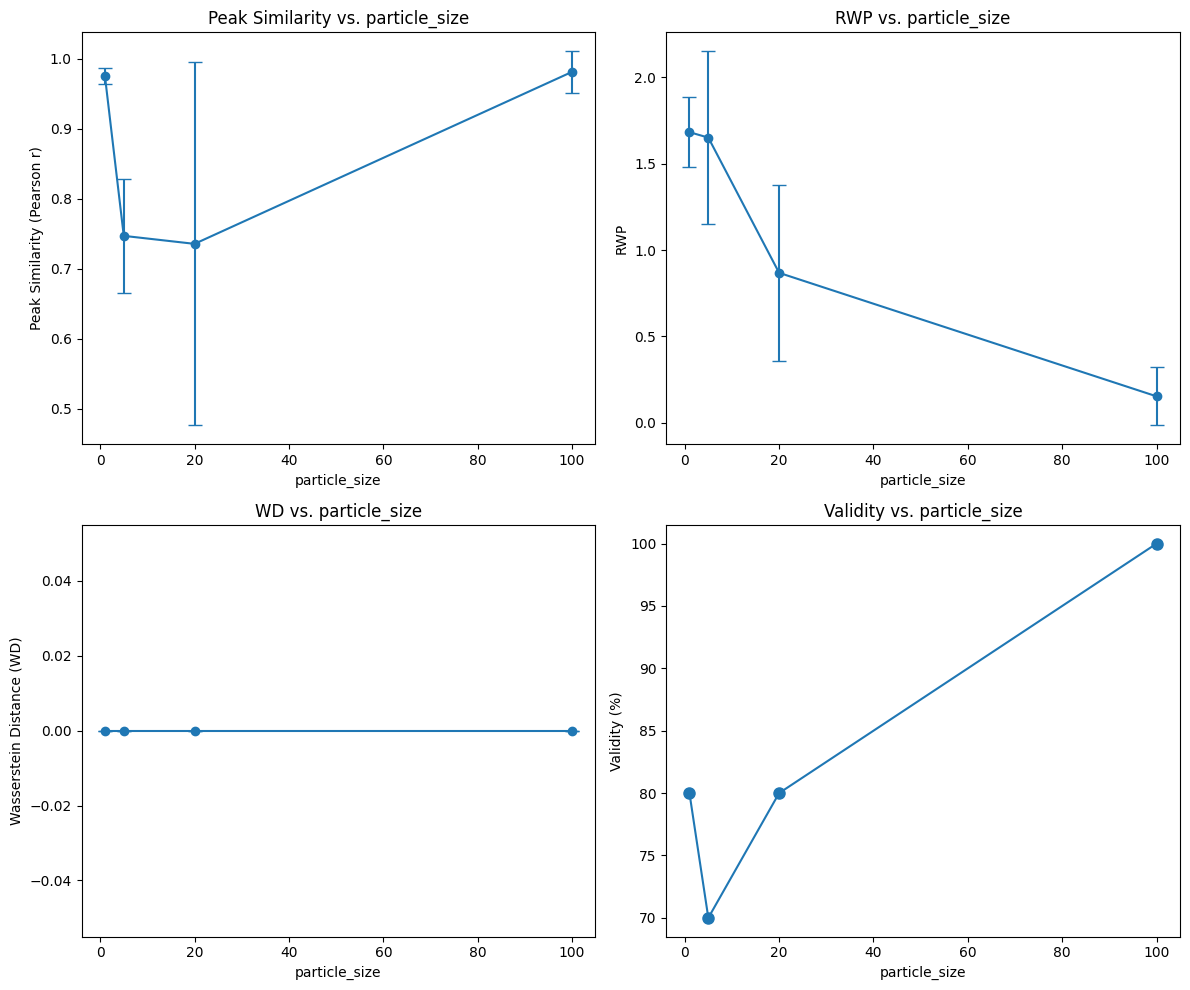

In [237]:
import numpy as np
import matplotlib.pyplot as plt

def plot_experiment_metrics_vs_parameter(results, param_name):
    """
    Plot multiple metrics from the experiment as a function of a given parameter.
    
    Metrics plotted:
        - Peak Similarity (Pearson correlation)
        - RWP (Residual weighted profile)
        - WD (Wasserstein Distance)
        - Validity (% of generated CIFs that pass validity tests)
    
    Args:
        results (dict): Dictionary returned by the experiment() function.
        param_name (str): The parameter name to plot against (e.g., "particle_size").
    """
    param_vals = []
    peak_sim_means = []
    peak_sim_stds = []
    rwp_means = []
    rwp_stds = []
    wd_means = []
    wd_stds = []
    valid_percents = []
    
    # Loop over each parameter combination.
    for combo_key, exp_list in results.items():
        # Assume all repeats for this combo share the same parameter value.
        param_val = exp_list[0]['params'][param_name]
        param_vals.append(param_val)
        
        # Gather the metric values over the repeats.
        peak_sims = [exp['peak_similarity'] for exp in exp_list]
        rwp_vals = [exp['rwp'] for exp in exp_list]
        wd_vals = [exp['wd'] for exp in exp_list]
        # Validity is a boolean; compute percentage of True values.
        valid_frac = np.mean([1 if exp['val'] else 0 for exp in exp_list]) * 100
        
        peak_sim_means.append(np.mean(peak_sims))
        peak_sim_stds.append(np.std(peak_sims))
        rwp_means.append(np.mean(rwp_vals))
        rwp_stds.append(np.std(rwp_vals))
        wd_means.append(np.mean(wd_vals))
        wd_stds.append(np.std(wd_vals))
        valid_percents.append(valid_frac)
    
    # Convert to arrays and sort by parameter value.
    param_vals = np.array(param_vals)
    peak_sim_means = np.array(peak_sim_means)
    peak_sim_stds = np.array(peak_sim_stds)
    rwp_means = np.array(rwp_means)
    rwp_stds = np.array(rwp_stds)
    wd_means = np.array(wd_means)
    wd_stds = np.array(wd_stds)
    valid_percents = np.array(valid_percents)
    
    sort_idx = np.argsort(param_vals)
    sorted_param_vals = param_vals[sort_idx]
    sorted_peak_sim_means = peak_sim_means[sort_idx]
    sorted_peak_sim_stds = peak_sim_stds[sort_idx]
    sorted_rwp_means = rwp_means[sort_idx]
    sorted_rwp_stds = rwp_stds[sort_idx]
    sorted_wd_means = wd_means[sort_idx]
    sorted_wd_stds = wd_stds[sort_idx]
    sorted_valid_percents = valid_percents[sort_idx]
    
    # Create a 2x2 subplot for the different metrics.
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    
    # Plot Peak Similarity.
    axs[0].errorbar(sorted_param_vals, sorted_peak_sim_means, yerr=sorted_peak_sim_stds,
                    fmt='o-', capsize=5)
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel("Peak Similarity (Pearson r)")
    axs[0].set_title("Peak Similarity vs. " + param_name)
    
    # Plot RWP.
    axs[1].errorbar(sorted_param_vals, sorted_rwp_means, yerr=sorted_rwp_stds,
                    fmt='o-', capsize=5)
    axs[1].set_xlabel(param_name)
    axs[1].set_ylabel("RWP")
    axs[1].set_title("RWP vs. " + param_name)
    
    # Plot WD.
    axs[2].errorbar(sorted_param_vals, sorted_wd_means, yerr=sorted_wd_stds,
                    fmt='o-', capsize=5)
    axs[2].set_xlabel(param_name)
    axs[2].set_ylabel("Wasserstein Distance (WD)")
    axs[2].set_title("WD vs. " + param_name)
    
    # Plot Validity (%).
    axs[3].plot(sorted_param_vals, sorted_valid_percents, 'o-', markersize=8)
    axs[3].set_xlabel(param_name)
    axs[3].set_ylabel("Validity (%)")
    axs[3].set_title("Validity vs. " + param_name)
    
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
# Example usage:
# Assume you have already run the experiment with a params_dict that varies, say, "particle_size".
# For instance:
#
# params_dict = {
#     "particle_size": [20, 50, 100],
#     "base_fwhm_range": [(0.1, 0.1)],
#     "peak_asymmetry_range": [(0.9, 0.9)],
#     "noise_range": [(0.01, 0.01)],
#     "preferred_orientation_range": [(0.9, 0.9)],
#     "chebychev_coeff_range": [(-0.1, -0.1)],
#     "chebychev_order": [3]
# }
#
# results = experiment(sample_cif, params_dict, model, n_repeats=3)
#
# Now, to plot all the metrics versus "particle_size":
plot_experiment_metrics_vs_parameter(res, "particle_size")


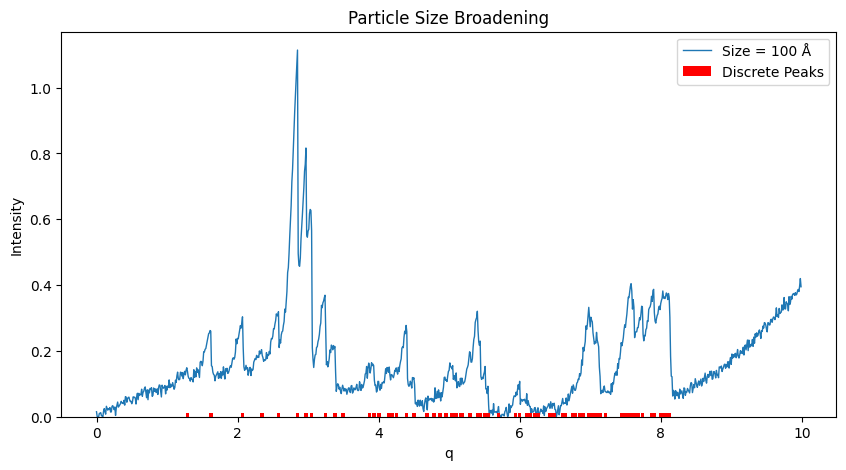

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
pxrd = pxrd_from_cif(
    sample_cif, 
    particle_size=100,
    base_fwhm_range=(0.1, 0.1),
    peak_asymmetry_range=(0.9, 0.9),
    noise_range=(0.01, 0.01),
    preferred_orientation_range=(0.9,0.9),
    chebychev_norm_coeff_range=(0.1, 0.1),
    chebychev_order=3,
    debug=True)
ax.plot(pxrd['q'], pxrd['iq'], lw=1, label=f"Size = {ps} Å")
q_disc = pxrd['q_disc'][0]
iq_disc = pxrd['iq_disc'][0]
ax.bar(q_disc, np.ones_like(iq_disc)*0.01, color='red', width=0.05, zorder=5, label="Discrete Peaks")
ax.set_title("Particle Size Broadening")
ax.set_xlabel("q")
ax.set_ylabel("Intensity")
add_discrete_legend(ax)

plt.show()

cond_vec = torch.from_numpy(pxrd['iq']).unsqueeze(0).to('cuda')

In [129]:
generated = model.generate_custom(
    idx=torch.tensor([START_ID]).unsqueeze(0).to('cuda'),
    max_new_tokens=3076,
    cond_vec=cond_vec,
    start_indices_batch=[[0]],
#     composition_string=composition_string if composition_string != "" else None,
#     spacegroup_string=spacegroup_string,
#     cell_a_string=f'{cell_a_value:.4f}' if cell_a_value else None,
#     cell_b_string=f'{cell_b_value:.4f}' if cell_b_value else None,
#     cell_c_string=f'{cell_c_value:.4f}' if cell_c_value else None,
#     cell_alpha_string=f'{cell_alpha_value:.4f}' if cell_alpha_value else None,
#     cell_beta_string=f'{cell_beta_value:.4f}' if cell_beta_value else None,
#     cell_gamma_string=f'{cell_gamma_value:.4f}' if cell_gamma_value else None,
#     atoms_string_list=atoms if len(atoms) > 0 else None,
#     exclude_elements=[el for (el,inact) in inactive_elements.items() if inact],
).cpu().numpy()

# Remove padding
generated = [ids[ids != PADDING_ID] for ids in generated]

cif_string_gen = DECODE(generated[0])
# Fix P1 issues if needed
cif_string_gen = replace_symmetry_loop_with_P1(cif_string_gen)
spacegroup_symbol = extract_space_group_symbol(cif_string_gen)
if spacegroup_symbol != "P 1":
    cif_string_gen = reinstate_symmetry_loop(cif_string_gen, spacegroup_symbol)

In [130]:
pxrd_clean = pxrd_from_cif(
    sample_cif,
#     peak_asymmetry_range=(0.9, 0.9),
)
pxrd_gen = pxrd_from_cif(
    cif_string_gen, 
#     particle_size=100,
#     base_fwhm_range=(0.1, 0.1),
#     peak_asymmetry_range=(0.9, 0.9),
#     noise_range=(0.01, 0.01),
#     preferred_orientation_range=(0.9,0.9),
#     chebychev_norm_coeff_range=(0.1, 0.1),
#     chebychev_order=3,
#     debug=True
)

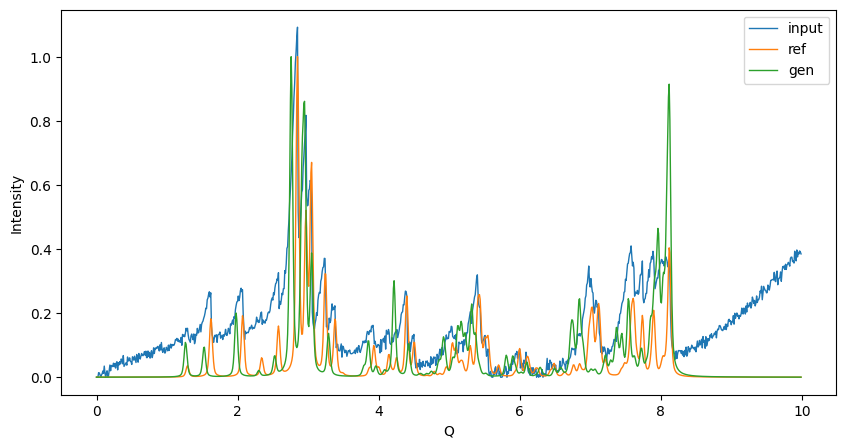

In [131]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(pxrd['q'], pxrd['iq'], lw=1, label=f"input")
ax.plot(pxrd_clean['q'], pxrd_clean['iq'], lw=1, label=f"ref")
ax.plot(pxrd_gen['q'], pxrd_gen['iq'], lw=1, label=f"gen")
ax.set_xlabel("Q")
ax.set_ylabel("Intensity")
ax.legend()
plt.show()

In [132]:
structure_ref = Structure.from_str(sample_cif, fmt='cif')
structure_gen = Structure.from_str(cif_string_gen, fmt='cif')

In [133]:
structure_ref

In [134]:
structure_gen

## Size

In [ ]:
for ps in [10, 50, 100]:
    